Found 7474 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 128)         1179776   
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 4,409,156
Trainable pa

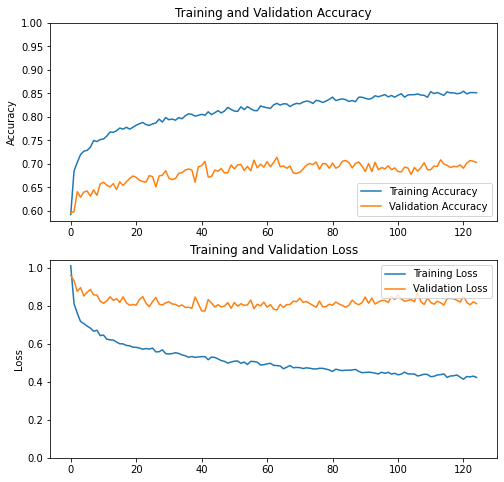

In [ ]:
# MobileNet with GAN Data Augmentation
# Import libraries
import os
import tensorflow as tf
from tensorflow import keras
import numpy
from matplotlib import pyplot as plt

# Setting base directory using GAN Generated Dataset
baseDirectory = '/content/drive/MyDrive/FYP - CAR DAMAGE DETECTION/Dataset/NewCustomDatasetNonDupGenerated'

# Setting training and validation directory based on the base directory 
trainDirectory = os.path.join(baseDirectory, 'Training')
validationDirectory = os.path.join(baseDirectory, 'Testing')
 
# Setting image size, batch size and number of classes in the dataset
IMAGE_SIZE = 128
BATCH_SIZE = 32
noClasses = 4

# Defining train image data generator
trainDatagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, fill_mode='nearest')

# Defining validation data generator
validationDatagen = keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

# Defining train dataset from training directory
trainGenerator = trainDatagen.flow_from_directory(directory=trainDirectory,
                                                  target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                  batch_size=BATCH_SIZE)
 
# Defining validation dataset from validation directory
validationGenerator = validationDatagen.flow_from_directory(directory=validationDirectory,
                                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                            batch_size=BATCH_SIZE)

# Setting image shape
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Setting base Transfer Learning model
baseModel = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE, include_top=False)
baseModel.trainable = False

# Setting stack on convlutional layers along with the base Transfer Learning model
baseModel = tf.keras.Sequential([
  baseModel,
  keras.layers.Conv2D(128, (3, 3), activation='sigmoid', input_shape=IMG_SHAPE, kernel_regularizer=keras.regularizers.l2(0.0001)),
  keras.layers.GlobalMaxPool2D(),
  keras.layers.Dropout(0.5),
  keras.layers.Flatten(),
  keras.layers.Dense(noClasses, activation='softmax')
])
 
baseModel.summary()

# Setting optimiser and loss function
baseModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting number of epochs
epochs = 125
stepsPerEpoch = numpy.ceil(trainGenerator.n / BATCH_SIZE)
validationSteps = numpy.ceil(validationGenerator.n / BATCH_SIZE)

# Training the model
history = baseModel.fit(trainGenerator,
                        steps_per_epoch=stepsPerEpoch,
                        epochs=epochs,
                        validation_data=validationGenerator, 
                        validation_steps=validationSteps)

# Evaluating performance of model on a graph
acc = history.history['accuracy']
valAcc = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(valAcc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(valLoss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

Found 3737 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 4100      
Total params: 3,232,964
Trainable params: 4,100
Non-trainable params: 3,228,864
_________________________________________________________________
Epoch 1/125
117/117 [==============================] - 43s 358ms/step - loss: 2.4282 - accuracy: 0.3195 - val_loss: 2.0416 - val_accuracy: 0.3302
Epoch 2/125
117/117 [==============================] - 41s 351ms/step - loss: 1.8715 - accuracy: 0.3631 - val_loss: 1.8185 - val_accuracy: 0

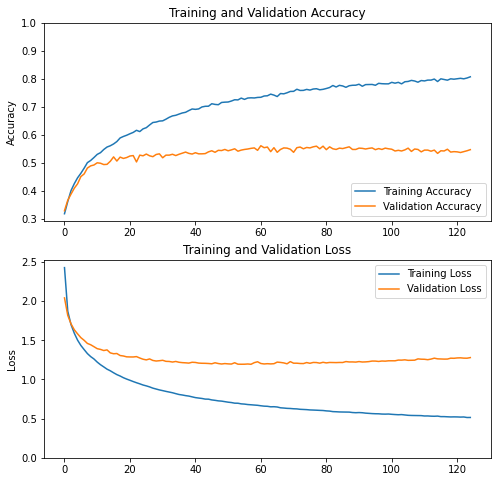

In [ ]:
# MobileNet without Data Augmentation
# Import libraries
import os
import tensorflow as tf
from tensorflow import keras
import numpy
from matplotlib import pyplot as plt

# Setting base directory
baseDirectory = '/content/drive/MyDrive/FYP - CAR DAMAGE DETECTION/Dataset/NewCustomDatasetNonDup'

# Setting training and validation directory based on the base directory 
trainDirectory = os.path.join(baseDirectory, 'Training')
validationDirectory = os.path.join(baseDirectory, 'Testing')

# Setting image size, batch size and number of classes in the dataset
IMAGE_SIZE = 128
BATCH_SIZE = 32
noClasses = 4

# Defining train image data generator
trainDatagen = keras.preprocessing.image.ImageDataGenerator()

# Defining validation data generator
validationDatagen = keras.preprocessing.image.ImageDataGenerator()

# Defining train dataset from training directory
trainGenerator = trainDatagen.flow_from_directory(directory=trainDirectory,
                                                  target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                  batch_size=BATCH_SIZE)

# Defining validation dataset from validation directory
validationGenerator = validationDatagen.flow_from_directory(directory=validationDirectory,
                                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                            batch_size=BATCH_SIZE)

# Setting image shape
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Setting base Transfer Learning model
baseModel = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE, include_top=False)
baseModel.trainable = False

# Setting stack on convlutional layers along with the base Transfer Learning model
baseModel = tf.keras.Sequential([
  baseModel,
  keras.layers.GlobalMaxPool2D(),
  keras.layers.Dense(noClasses, activation='softmax')
])

baseModel.summary()

# Setting optimiser and loss function
baseModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting number of epochs
epochs = 125
stepsPerEpoch = numpy.ceil(trainGenerator.n / BATCH_SIZE)
validationSteps = numpy.ceil(validationGenerator.n / BATCH_SIZE)

# Training the model
history = baseModel.fit(trainGenerator,
                        steps_per_epoch=stepsPerEpoch,
                        epochs=epochs,
                        validation_data=validationGenerator, 
                        validation_steps=validationSteps)

# Evaluating performance of model on a graph
acc = history.history['accuracy']
valAcc = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(valAcc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(valLoss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

Found 7474 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.
9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         1474688   
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4) 

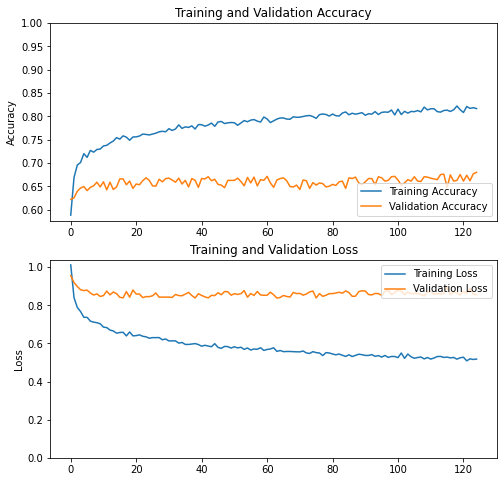

In [ ]:
# MobileNetV2 with GAN Data Augmentation
# Import libraries
import os
import tensorflow as tf
from tensorflow import keras
import numpy
from matplotlib import pyplot as plt

# Setting base directory using GAN Generated Dataset
baseDirectory = '/content/drive/MyDrive/FYP - CAR DAMAGE DETECTION/Dataset/NewCustomDatasetNonDupGenerated'

# Setting training and validation directory based on the base directory  
trainDirectory = os.path.join(baseDirectory, 'Training')
validationDirectory = os.path.join(baseDirectory, 'Testing')

# Setting image size, batch size and number of classes in the dataset
IMAGE_SIZE = 128
BATCH_SIZE = 32
noClasses = 4

# Defining train image data generator
trainDatagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, fill_mode='nearest')

# Defining validation data generator
validationDatagen = keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

# Defining train dataset from training directory
trainGenerator = trainDatagen.flow_from_directory(directory=trainDirectory,
                                                  target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                  batch_size=BATCH_SIZE)

# Defining validation dataset from validation directory
validationGenerator = validationDatagen.flow_from_directory(directory=validationDirectory,
                                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                            batch_size=BATCH_SIZE)

# Setting image shape
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Setting base Transfer Learning model
baseModel = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False)
baseModel.trainable = False

# Setting stack on convlutional layers along with the base Transfer Learning model
baseModel = tf.keras.Sequential([
  baseModel,
  keras.layers.Conv2D(128, (3, 3), activation='sigmoid', input_shape=IMG_SHAPE, kernel_regularizer=keras.regularizers.l2(0.0001)),
  keras.layers.GlobalMaxPool2D(),
  keras.layers.Dropout(0.5),
  keras.layers.Flatten(),
  keras.layers.Dense(noClasses, activation='softmax')
])

baseModel.summary()

# Setting optimiser and loss function
baseModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting number of epochs
epochs = 125
stepsPerEpoch = numpy.ceil(trainGenerator.n / BATCH_SIZE)
validationSteps = numpy.ceil(validationGenerator.n / BATCH_SIZE)

# Training the model
history = baseModel.fit(trainGenerator,
                        steps_per_epoch=stepsPerEpoch,
                        epochs=epochs,
                        validation_data=validationGenerator, 
                        validation_steps=validationSteps)

# Evaluating performance of model on a graph
acc = history.history['accuracy']
valAcc = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(valAcc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(valLoss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

Found 3737 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_max_pooling2d_5 (Glob (None, 1280)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/125
117/117 [==============================] - 44s 359ms/step - loss: 2.0709 - accuracy: 0.2703 - val_loss: 1.7476 - val_accuracy: 0.3021
Epoch 2/125
117/117 [==============================] - 41s 352ms/step - loss: 1.6123 - accuracy: 0.3377 - val_loss: 1.5437 - val_accuracy: 0

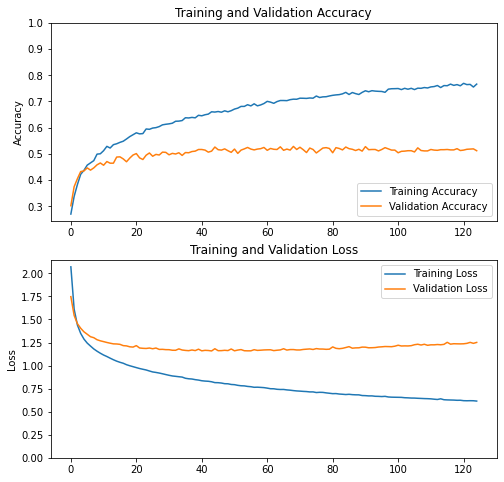

In [ ]:
# MobileNetV2 without Data Augmentation
# Import libraries
import os
import tensorflow as tf
from tensorflow import keras
import numpy
from matplotlib import pyplot as plt

# Setting base directory
baseDirectory = '/content/drive/MyDrive/FYP - CAR DAMAGE DETECTION/Dataset/NewCustomDatasetNonDup'

# Setting training and validation directory based on the base directory 
trainDirectory = os.path.join(baseDirectory, 'Training')
validationDirectory = os.path.join(baseDirectory, 'Testing')

# Setting image size, batch size and number of classes in the dataset
IMAGE_SIZE = 128
BATCH_SIZE = 32
noClasses = 4

# Defining train image data generator
trainDatagen = keras.preprocessing.image.ImageDataGenerator()

# Defining validation data generator
validationDatagen = keras.preprocessing.image.ImageDataGenerator()

# Defining train dataset from training directory
trainGenerator = trainDatagen.flow_from_directory(directory=trainDirectory,
                                                  target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                  batch_size=BATCH_SIZE)

# Defining validation dataset from validation directory
validationGenerator = validationDatagen.flow_from_directory(directory=validationDirectory,
                                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                            batch_size=BATCH_SIZE)

# Setting image shape
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Setting base Transfer Learning model
baseModel = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False)
baseModel.trainable = False

# Setting stack on convlutional layers along with the base Transfer Learning model
baseModel = tf.keras.Sequential([
  baseModel,
  keras.layers.GlobalMaxPool2D(),
  keras.layers.Dense(noClasses, activation='softmax')
])

baseModel.summary()

# Setting optimiser and loss function
baseModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting number of epochs
epochs = 125
stepsPerEpoch = numpy.ceil(trainGenerator.n / BATCH_SIZE)
validationSteps = numpy.ceil(validationGenerator.n / BATCH_SIZE)

# Training the model
history = baseModel.fit(trainGenerator,
                        steps_per_epoch=stepsPerEpoch,
                        epochs=epochs,
                        validation_data=validationGenerator, 
                        validation_steps=validationSteps)

# Evaluating performance of model on a graph
acc = history.history['accuracy']
valAcc = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(valAcc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(valLoss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

Found 3737 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
p_re_lu (PReLU)              (None, 128, 128, 64)      1048576   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 128, 128, 64)      1048576   
_________________________________________________________________
average_pooling2d (AveragePo (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 64)        0         
____________________________________

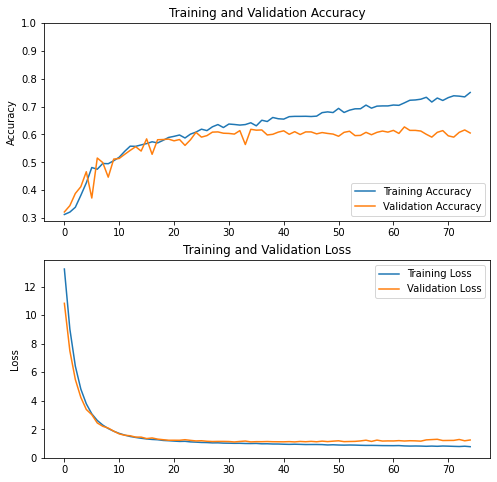

In [ ]:
# Custom CNN without Data Augmentation
# Import libraries
import os
import tensorflow as tf
from tensorflow import keras
import numpy
from matplotlib import pyplot as plt

# Setting base directory
baseDirectory = '/content/drive/MyDrive/FYP - CAR DAMAGE DETECTION/Dataset/NewCustomDatasetNonDup'

# Setting training and validation directory based on the base directory  
trainDirectory = os.path.join(baseDirectory, 'Training')
validationDirectory = os.path.join(baseDirectory, 'Testing')

# Setting image size, batch size and number of classes in the dataset
IMAGE_SIZE = 128
BATCH_SIZE = 32
noClasses = 4

# Defining train image data generator
trainDatagen = keras.preprocessing.image.ImageDataGenerator()

# Defining validation data generator
validationDatagen = keras.preprocessing.image.ImageDataGenerator()

# Defining train dataset from training directory
trainGenerator = trainDatagen.flow_from_directory(directory=trainDirectory,
                                                  target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                  batch_size=BATCH_SIZE)

# Defining validation dataset from validation directory
validationGenerator = validationDatagen.flow_from_directory(directory=validationDirectory,
                                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                            batch_size=BATCH_SIZE)

# Setting image shape
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Setting stack on convlutional layers
baseModel = tf.keras.Sequential([
    keras.layers.Conv2D(64,(3, 3), activation='relu', input_shape=IMG_SHAPE, padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(64,(3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.6),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.6),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.6),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.6),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.6),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(4096, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(4, activation='softmax')
])

baseModel.summary()

# Setting optimiser and loss function
baseModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting number of epochs
epochs = 75
stepsPerEpoch = numpy.ceil(trainGenerator.n / BATCH_SIZE)
validationSteps = numpy.ceil(validationGenerator.n / BATCH_SIZE)

# Training the model
history = baseModel.fit(trainGenerator,
                        steps_per_epoch=stepsPerEpoch,
                        epochs=epochs,
                        validation_data=validationGenerator, 
                        validation_steps=validationSteps)

# Evaluating performance of model on a graph
acc = history.history['accuracy']
valAcc = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(valAcc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(valLoss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

Found 7474 images belonging to 4 classes.
Found 1281 images belonging to 4 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
p_re_lu (PReLU)              (None, 128, 128, 64)      1048576   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 128, 128, 64)      1048576   
_________________________________________________________________
average_pooling2d (AveragePo (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
______________________________________

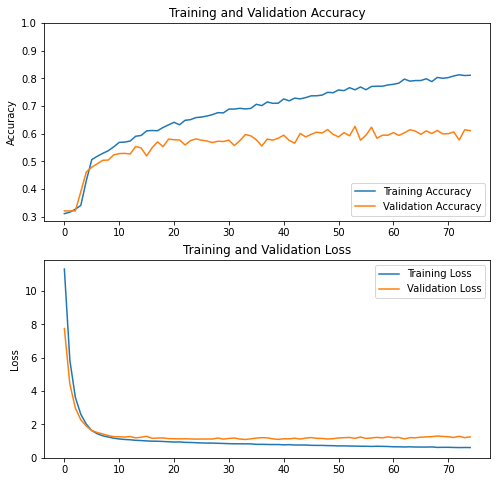

In [ ]:
# Custom CNN with GAN Data Augmentation
# Import libraries
import os
import tensorflow as tf
from tensorflow import keras
import numpy
from matplotlib import pyplot as plt

# Setting base directory for the GAN Generated Dataset
baseDirectory = '/content/drive/MyDrive/FYP - CAR DAMAGE DETECTION/Dataset/NewCustomDatasetNonDupGenerated'

# Setting training and validation directory based on the base directory  
trainDirectory = os.path.join(baseDirectory, 'Training')
validationDirectory = os.path.join(baseDirectory, 'Testing')

# Setting image size, batch size and number of classes in the dataset
IMAGE_SIZE = 128
BATCH_SIZE = 32
noClasses = 4

# Defining train image data generator
trainDatagen = keras.preprocessing.image.ImageDataGenerator()

# Defining validation data generator
validationDatagen = keras.preprocessing.image.ImageDataGenerator()

# Defining train dataset from training directory
trainGenerator = trainDatagen.flow_from_directory(directory=trainDirectory,
                                                  target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                  batch_size=BATCH_SIZE)

# Defining validation dataset from validation directory
validationGenerator = validationDatagen.flow_from_directory(directory=validationDirectory,
                                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                            batch_size=BATCH_SIZE)

# Setting image shape
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Setting stack on convlutional layers
baseModel = tf.keras.Sequential([
    keras.layers.Conv2D(64,(3, 3), activation='relu', input_shape=IMG_SHAPE, padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(64,(3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.6),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.6),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.6),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.6),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.Conv2D(512, (3, 3), activation='relu', padding="same", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.PReLU(),
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.6),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(4096, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(4, activation='softmax')
])

baseModel.summary()

# Setting optimiser and loss function
baseModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting number of epochs
epochs = 75
stepsPerEpoch = numpy.ceil(trainGenerator.n / BATCH_SIZE)
validationSteps = numpy.ceil(validationGenerator.n / BATCH_SIZE)

# Training the model
history = baseModel.fit(trainGenerator,
                        steps_per_epoch=stepsPerEpoch,
                        epochs=epochs,
                        validation_data=validationGenerator, 
                        validation_steps=validationSteps)

# Evaluating performance of model on a graph
acc = history.history['accuracy']
valAcc = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(valAcc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(valLoss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()